In [1]:
## getdata.py
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
## getdata.py
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Visualization/Exploration

In [3]:
from matplotlib import pyplot as plt

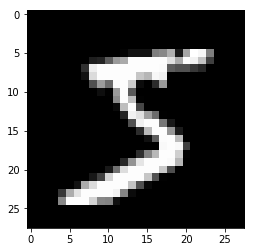

In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
print(y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Train locally

In [7]:
## task.py
# from getdata import x_train, y_train # This is added to the exported .py file

import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
## task.py

optimizer = keras.optimizers.RMSprop()
loss = keras.losses.categorical_crossentropy

model.compile(optimizer, loss)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
## task.py

model.fit(x_train, y_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 5s - loss: 8.6565     
Epoch 2/2
60000/60000 [==============================] - 4s - loss: 7.5863     


## These next cells export the cells marked with "##"

In [10]:
from cmle_utils import ipynb_to_py

In [11]:
ipynb_to_py(source='ipynb_to_py.ipynb', export_base='trainer')

File written: trainer/getdata.py
File written: trainer/task.py


## Train on CMLE

In [12]:
from cmle_utils import build_and_upload_package, train_model

In [13]:
package_path = build_and_upload_package('gs://sandbox-cmle/tmp/ipynb_to_py')

In [14]:
# train in the cloud
import time
import os

BUCKET = 'gs://sandbox-cmle/tmp/ipynb_to_py'
JOB_DIR = os.path.join(BUCKET, 'output')

training_inputs = {
    'scaleTier': 'BASIC',
    'packageUris': [package_path],
    'pythonModule': 'trainer.task',
    'region': 'us-central1',
    'jobDir': JOB_DIR,
    'runtimeVersion': '1.9',
    'args': []
}
job_spec = {'jobId': 'test_' + str(int(time.time())), 'trainingInput': training_inputs}

In [15]:
PROJECT_ID = 'rising-sea-112358'
train_model(PROJECT_ID, job_spec)

{u'createTime': u'2018-11-01T18:20:38Z',
 u'etag': u'8Ppf9XQAK7s=',
 u'jobId': u'test_1541096437',
 u'state': u'QUEUED',
 u'trainingInput': {u'jobDir': u'gs://sandbox-cmle/tmp/ipynb_to_py/output',
  u'packageUris': [u'gs://sandbox-cmle/tmp/ipynb_to_py/cmle-sample-0.0.1.tar.gz'],
  u'pythonModule': u'trainer.task',
  u'region': u'us-central1',
  u'runtimeVersion': u'1.9'},
 u'trainingOutput': {}}